<center>

# Домашнее задание по Статистическим и Эмпирическим Методам Компьютинга

### Подготовил Куприянов Кирилл Игоревич, студент гр. БПИ 151(1)

</center> Задание 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as sts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Чтение данных из .xls файла
bal, brick, d2, d3, d4, dist, floor, totsp, walk - объясняющие переменные для цены (price) квартиры

In [8]:
df = pd.read_excel('Данные к задаче 5 дз.xlsx')

bal = list(df['bal_7'])
brick = list(df['brick_7'])
d2 = list(df['d2_7'])
d3 = list(df['d3_7'])
d4 = list(df['d4_7'])
dist = list(df['dist_7'])
floor = list(df['floor_7'])
price = list(df['price_7'])
totsp = list(df['totsp_7'])
walk = list(df['walk_7'])

### Очистка данных от записей с пропусками

In [9]:
cols = [bal, brick, d2, d3, d4, dist, floor, price, totsp, walk]
to_be_removed = []
for col in cols:
    for j in range(0, len(col)):
        if np.isnan(col[j]):
            to_be_removed.append(j)
            
to_be_removed = sorted(list(set(to_be_removed)))
for rem in range(len(to_be_removed) - 1, -1, -1):
    for i in range(0, len(cols)):
        cols[i].pop(to_be_removed[rem])

In [10]:
def graphs(reg, y):
    plt.scatter(reg.fittedvalues, reg.resid)
    plt.xlabel('fitted')
    plt.ylabel('residuals')
    plt.show()

    plt.scatter(reg.fittedvalues, y)
    plt.xlabel('fitted')
    plt.ylabel('observed')
    plt.show()

    hist, bins = np.histogram(reg.resid, bins=15)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

### Построим линейную модель и графики

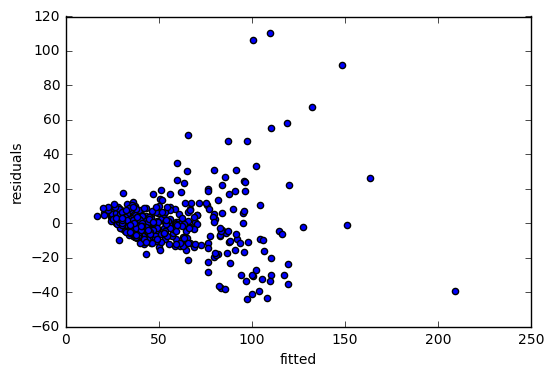

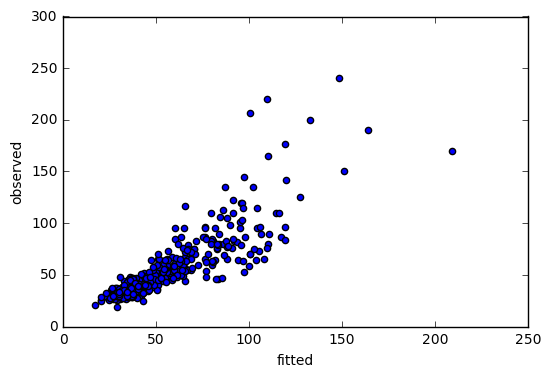

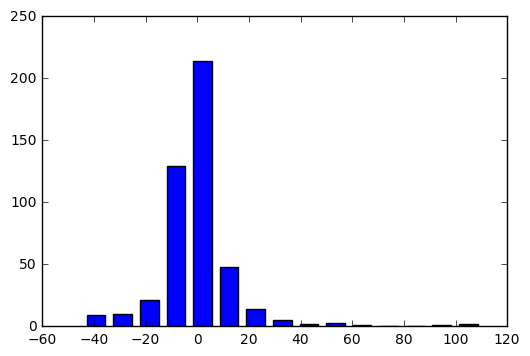

In [11]:
reg = sm.OLS(endog=price, exog=sm.add_constant(np.array([bal, brick, d2, d3, d4, dist, floor, totsp, walk]).T)).fit()
graphs(reg, price)

### Интерпретируем графики
Линейная регрессия дает плохие результаты

Первый график в идеале должен быть равномерно распределен по все области

Второй график в идеале должен быть распределн вдоль прямой $y = \hat{y}$

гисторграмма остатков в идеале имеет нормальное распределение

In [12]:
reg.predict(exog=np.array([1, 1, 1, 0, 0, 0, 10, 1, 40, 1]).reshape(1, -1))

array([ 52.59222299])

### Используем полулогарифмическую зависимость

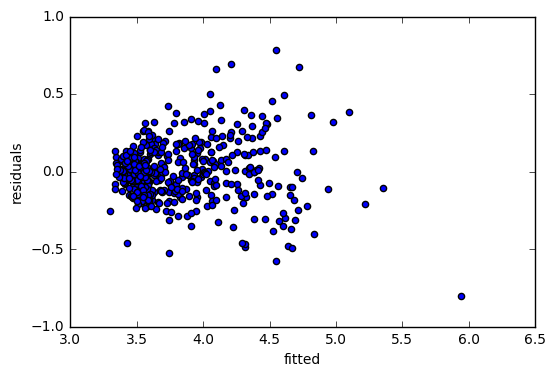

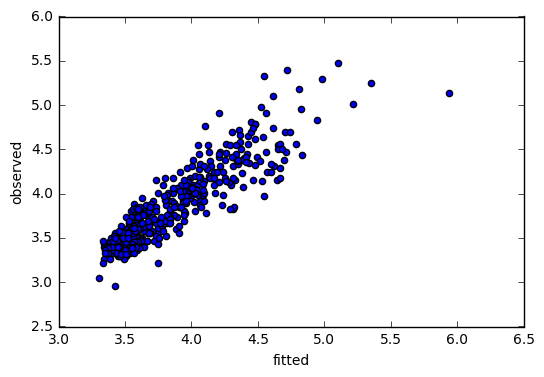

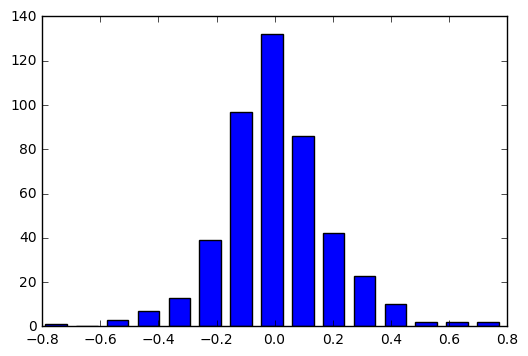

In [13]:
reg2 = sm.OLS(endog=np.log(price), exog=sm.add_constant(np.array([bal, brick, d2, d3, d4, dist, floor, totsp, walk]).T)).fit()
graphs(reg2, np.log(price))

Стало лучше.

residuals распределены более равномерно

observed более близок к прямой $y = \hat{y}$

гисторграмма остатков распределена более-менее нормально

### Предскажем цену квартиры по параметрам с помощью полулогарифмической регресии

In [14]:
np.exp(reg2.predict(exog=np.array([1, 1, 1, 0, 0, 0, 10, 1, 40, 1]).reshape(1, -1)))

array([ 44.63752805])

### Используем логарифмическую зависимость

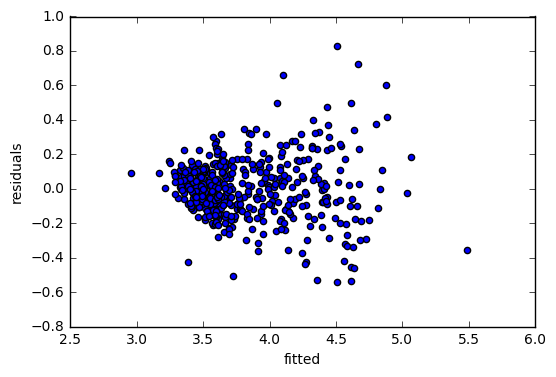

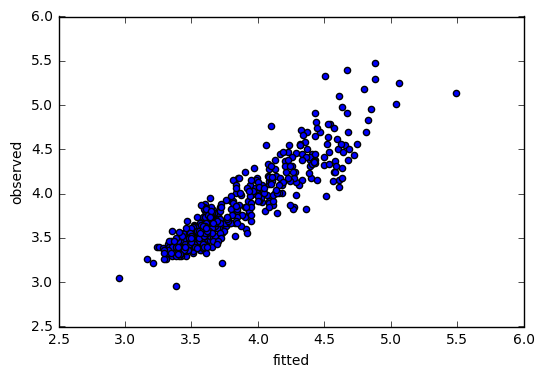

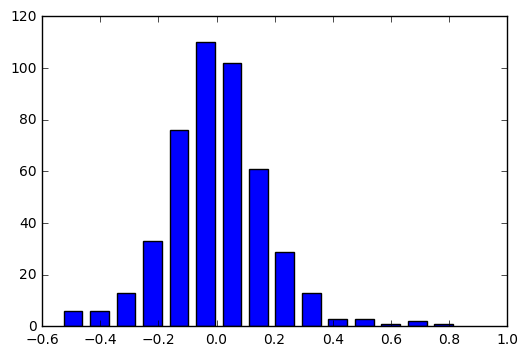

In [15]:
reg3 = sm.OLS(endog=np.log(price), exog=sm.add_constant(np.array([bal, brick, d2, d3, d4, np.log(dist), floor, np.log(totsp), walk]).T)).fit()
graphs(reg3, np.log(price))

Стало лучше.

residuals распределены более равномерно

observed более близок к прямой $y = \hat{y}$

гисторграмма остатков распределена более-менее нормально

### Предскажем цену квартиры по параметрам с помощью логарифмической модели

In [17]:
np.exp(reg3.predict(exog=np.array([1, 1, 1, 0, 0, 0, np.log(10), 1, np.log(40), 1]).reshape(1, -1)))

array([ 47.97017356])

Примем цену 48 как более достоверную среди трех моделей, так как визуальная диагностика показала, что логарифмическая регресия является наиболее подходящей

### Интерпретация коэффициентов логарифмической модели

In [18]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sun, 21 May 2017   Prob (F-statistic):          4.86e-173
Time:                        17:32:24   Log-Likelihood:                 141.99
No. Observations:                 459   AIC:                            -264.0
Df Residuals:                     449   BIC:                            -222.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9648      0.222     -4.345      0.0

Увеличение регрессора на 1% приблизительно соответствует увеличению y на C% при прочих равных условиях. 

Например, коэффициент при $x_9 \approx 0.09$, это значит, что квартиры, от которых можно быстро дойти до метро стоят на 9% дороже. 

Коэффициент при $x_2 \approx 0.13$,  что квартиры в кирпичных домах 13% дороже.

Регрессоры $dist$ и $totsp$ ($x_5$ и $x_8$ соответственно) - расстояние до центра города и площадь квартиры.

Значения расстояние до центра и цена обратно зависимы.

Площадь и цена зависимы прямо пропорционально.

Можно сделать вывод что наиболее значимым регрессором является площадь квартиры, затем идет расстояние до центра города.
Все остальные регрессоры имеют примерно одинаковую значимость (все - менее 5%, то есть все - значимы).